In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar  2 02:16:07 2021

    Monte Carlo - Problema Monty Hall si Paradoxul Zilelor de Nastere
    
@author: Me
@grupa: 341
@proiect: Proiect 1
"""

In [ ]:
# Biblioteci
from random import shuffle, choice, randint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
"""
    1) Monty Hall, folosind Monte Carlo

Enunț: Te afli la un concurs, unde ai posibilitatea de a câstiga o masină, dacă 
       selectezi corect în spatele căreia dintre cele 3 usi se află (în spatele
       celorlalte 2 usi se află capre). Îți faci alegerea, iar gazda show-ului ,
       stiind ce se află în spatele fiecărei usi, deschide una dintre usile care
       ascunde o capră. Acum, gazda îți oferă posibilitatea de a schimba usa pe
       care ai selectat-o sau de a rămâne la alegerea inițială. Care este 
       probabilitatea de câstig în funcție de alegerea participantului?

Informații: Majoritatea oamenilor ar rămâne la alegerea inițială, dar o să 
            demonstrăm de ce această strategie este mai dezavantajoasă.

Link explicații: https://www.youtube.com/watch?v=iBdjqtR2iK4
"""

In [ ]:
# Programul care conține informații despre concurs
def MontyHall():
    # Usile: 0 - capră, 1 - masină
    usi = [1, 0, 0]
    # Lăsăm calculatorul să le amestece random
    shuffle(usi)
    
    """
    # Ce obținem în acest caz, după amestecarea usilor
    for i in range(3):
        if usi[i]: print(f"Usa {i + 1}: WOW! O nouă masină!")
        else: print(f"Usa {i + 1}: Surpriză Tristă! Beeeee!")
    """


    # Concurentul alege o usa Random
    usa_aleasa = choice([0, 1, 2])
    # print(f"Concurentul a ales usa: {usa_aleasa + 1}\n")
    
    
    # Gazda Show-ului deschide una dintre usile care ascund o capră
    usi_capre = list() # creăm o listă pt că, fie jucătorul a ales masina si
                       # atunci avem 2 usi care au capre; fie jucătorul a ales 
                       # o capră, deci mai rămâne o singură usa cu capră în spatele ei
    for i in range(3):
        if usi[i] == 0 and i != usa_aleasa: usi_capre.append(i)
    usa_deschisa = choice(usi_capre)
    
    
    # Calculăm dacă a câstigat sau nu, în funcție de cele 2 decizii
    ## Păstrează usa Veche
    if usi[usa_aleasa]: catig_usaVeche = 1 
    else: catig_usaVeche = 0
    # print(catig_usaVeche)
    
    ## Schimb usa
    usa_ramasa = set([0, 1, 2]).difference([usa_aleasa, usa_deschisa])
    usa_ramasa = usa_ramasa.pop()
    if usi[usa_ramasa]: catig_usaNoua = 1 
    else: catig_usaNoua = 0
    # print(catig_usaNoua)
    
    
    return catig_usaVeche, catig_usaNoua

In [ ]:
# Programul care conține Simularea Monte Carlo
def MonteCarlo(n):
    """

    Parameters
    ----------
    n : nr de simulări aplicate.

    Returns
    -------
    Probabilitățile de câstig în ambele situații.

    """
    
    # Variabile pentru a număra câstigurile
    castig_usaVeche = 0
    castig_usaNoua = 1
    
    # Rulăm toate simulările si nr câstigurile în fiecare caz
    for i in range(n):
        x, y = MontyHall()
        castig_usaVeche += x
        castig_usaNoua += y
    
    print(f"\n\nS-au rulat {n} simulări.")
    print(f"Nr Câstiguri când Usa Veche: {castig_usaVeche} -> {(castig_usaVeche/n)*100}%")
    print(f"Nr Câstiguri când Usa Noua: {castig_usaNoua} -> {(castig_usaNoua/n)*100}%")

In [ ]:
# Rulăm Simulările
n = input("Introduceți Nr de Simulări: ") 
MonteCarlo(int(n))

"""
    Concluzie: Este mult mai avantajos să schimbăm usa. Pentru a înțelege de
               ce, recomand să ne documentăm despre pincipiul lui Newton.
"""

Introduceți Nr de Simulări: 1000000


S-au rulat 1000000 simulări.
Nr Câstiguri când Usa Veche: 333576 -> 33.3576%
Nr Câstiguri când Usa Noua: 666425 -> 66.6425%


'\n    Concluzie: Este mult mai avantajos să schimbăm usa. Pentru a înțelege de\n               ce, recomand să ne documentăm despre pincipiul lui Newton.\n'

In [ ]:
"""
    2) Paradoxul Zilei de Nastere, folosind Monte Carlo

Enunț: Prin metoda Monte Carlo, vom demonstra că este nevoie de aproximativ 23
       de oameni pentru ca, probabilitatea ca 2 dintre ei să aibă aceeasi zi de
       nastere să fie ~50% si vom vedea cum se modifică probabilitatea în funcție
       de numărul de oameni.

Informații: Am crede că este nevoie de un număr foarte mare de oameni pentru a
            putea avea măcar 2 care să împărtăsească aceeasi zi de nastere; dar 
            matematica si statistica ne dovedesc contrariul.
            Vom face 3 presupuneri:
                1) Zilele de Nastere sunt independente una față de alta.
                2) Fiecare zi de nastere are aceeasi probabilitate.
                3) Vom considera 365 de zile de nastere (ignorăm anii bisecți).

Link explicații: https://www.youtube.com/watch?v=KtT_cgMzHx8
"""

In [ ]:
# Definim Numărul Maxim de Zile ale Anului
Nr_Max_Zile_Nastere = 365



# Funcție care generează o zi de nastere Random
def ziN_random():
    zi = randint(1, Nr_Max_Zile_Nastere)
    return zi

# Funcție care generează k zile de nastere Random
def k_ziN_random(k):
    zile = [ziN_random() for i in range(k)]
    return zile

# Verific dacă în setul meu de zile generate aleator există dubluri
def suntDubluri(zileN):
    # set = mulțime în mate (nu are voie să conțină dubluri)
    zile_unice = set(zileN)
    
    nr_zile_unice = len(zile_unice)
    nr_zile = len(zileN) # zileN este listă definită prin subprogramul anterior
    
    return (nr_zile_unice != nr_zile) # True dacă sunt diferite, deci am dubluri

In [ ]:
# Funcție pt a estima câte dubluri sunt într-un grup de k oameni, rulând n Simulări
def BirthdayParadox1(k, n):
    """

    Parameters
    ----------
    k : nr de oameni.
    n : nr de simulări.
    
    Returns
    -------
    Probabilitatea ca acestia să aibă aceeasi zi de nastere.

    """
    
    dubluri = 0
    for i in range(n):
        zile = k_ziN_random(k)
        are_dubluri = suntDubluri(zile)
        if are_dubluri: dubluri += 1
    
    procentaj = dubluri / n
    # print(f"Procentaj: {procentaj*100}%")
    return procentaj

In [ ]:
# Funcție care estimează dublurile cu cât avem mai mulți oameni, rulând n Simulări
def BirthdayParadox2(n):
    probabilitati = []
    
    # O să iau între 0 si 100 de oameni
    for i in range(100):
        prob = BirthdayParadox1(i, n)
        probabilitati.append(prob)
    
    return probabilitati 

In [ ]:
# Rulăm Simulările
n = input("Introduceți Nr de Simulări: ") 
probabilitati = BirthdayParadox2(int(n)) 
print(probabilitati)

Introduceți Nr de Simulări: 10000
[0.0, 0.0, 0.003, 0.008, 0.0127, 0.0244, 0.0392, 0.0543, 0.0774, 0.0953, 0.1101, 0.1438, 0.1657, 0.1945, 0.2201, 0.2481, 0.289, 0.3197, 0.3507, 0.3816, 0.4097, 0.441, 0.4723, 0.505, 0.5294, 0.5685, 0.5945, 0.6363, 0.6553, 0.6687, 0.7047, 0.7262, 0.7508, 0.7804, 0.7959, 0.8223, 0.8253, 0.8423, 0.8612, 0.8765, 0.8856, 0.9072, 0.9079, 0.9252, 0.9335, 0.9386, 0.9443, 0.953, 0.9624, 0.9649, 0.9723, 0.974, 0.9777, 0.9821, 0.9838, 0.9835, 0.9892, 0.9894, 0.9934, 0.9937, 0.9935, 0.9949, 0.9958, 0.9967, 0.9976, 0.9972, 0.9976, 0.9986, 0.9985, 0.9987, 0.9989, 0.9993, 0.9992, 0.9992, 0.9996, 0.9996, 0.9997, 0.9998, 0.9998, 0.9997, 0.9998, 1.0, 1.0, 0.9999, 0.9999, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
# Tabel
data_table = pd.DataFrame({'Nr Oameni': range(100), 'Probabilitate': probabilitati})
print(data_table)

    Nr Oameni  Probabilitate
0           0         0.0000
1           1         0.0000
2           2         0.0030
3           3         0.0080
4           4         0.0127
..        ...            ...
95         95         1.0000
96         96         1.0000
97         97         1.0000
98         98         1.0000
99         99         1.0000

[100 rows x 2 columns]


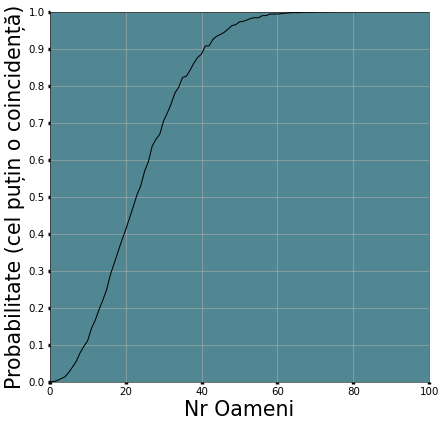

In [ ]:
 # Grafic   
fig, ax = plt.subplots(figsize=(10, 10), dpi=49)
ax.set_facecolor('#518792')
ax.xaxis.set_tick_params(width=5, color='black')
ax.yaxis.set_tick_params(width=5, color='black')
sns.lineplot(x=range(100), y=probabilitati, color='black')
plt.xticks(fontsize=15, color='black')
y_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.yticks(y_range, fontsize=15, color='black')
plt.grid()
plt.xlim([0, 100])
plt.ylim([0, 1])
plt.xlabel('Nr Oameni', fontsize=30, color='black')
plt.ylabel('Probabilitate (cel puțin o coincidență)', fontsize=30, color='black')
plt.show()  